## GNOD 1


### Lab | Web Scraping Single Page

#### Business goal:
Check the case_study_gnod.md file.

Make sure you've understood the big picture of your project:

- the goal of the company (Gnod),
- their current product (Gnoosic),
- their strategy, and
- how your project fits into this context.

Re-read the business case and the e-mail from the CTO, take a look at the flowchart and create an initial Trello board with the tasks you think you'll have to accomplish.





#### Instructions - Scraping popular songs
Your product will take a song as an input from the user and will output another song (the recommendation). In most cases, the recommended song will have to be similar to the inputted song, but the CTO thinks that if the song is on the top charts at the moment, the user will enjoy more a recommendation of a song that's also popular at the moment.

You have find data on the internet about currently popular songs. Billboard maintains a weekly Top 100 of "hot" songs here: https://www.billboard.com/charts/hot-100.

It's a good place to start! Scrape the current top 100 songs and their respective artists, and put the information into a pandas dataframe.




--> popvortex.com/music/charts/top-100-songs.php

In [1]:
# Libraries
import pandas as pd
import requests
from bs4 import BeautifulSoup
import time
import random


In [2]:
url = 'https://www.popvortex.com/music/charts/top-100-songs.php'
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

In [3]:
display(response.status_code)
#soup

200

In [4]:
# Artist Name // #chart-position-1 > div.chart-content.col-xs-12.col-sm-8 > p > em

# Song title // #chart-position-1 > div.chart-content.col-xs-12.col-sm-8 > p > cite

# genre // #chart-position-1 > div.chart-content.col-xs-12.col-sm-8 > ul > li:nth-child(2) > a

# release date // #chart-position-1 > div.chart-content.col-xs-12.col-sm-8 > ul > li:nth-child(3)

In [5]:
#soup.select("p")

In [6]:
soup.select("p cite")[0:10]

[<cite class="title">Last Night</cite>,
 <cite class="title">Flowers</cite>,
 <cite class="title">Fast Car</cite>,
 <cite class="title">Thank God I Do</cite>,
 <cite class="title">Like Crazy (Deep House Remix)</cite>,
 <cite class="title">Like Crazy (UK Garage Remix)</cite>,
 <cite class="title">Like Crazy (Instrumental)</cite>,
 <cite class="title">Like Crazy (English Version)</cite>,
 <cite class="title">FLOWER</cite>,
 <cite class="title">Calm Down</cite>]

In [7]:
soup.select("p em")[0:10]

[<em class="artist">Morgan Wallen</em>,
 <em class="artist">Miley Cyrus</em>,
 <em class="artist">Luke Combs</em>,
 <em class="artist">Lauren Daigle</em>,
 <em class="artist">Jimin</em>,
 <em class="artist">Jimin</em>,
 <em class="artist">Jimin</em>,
 <em class="artist">Jimin</em>,
 <em class="artist">JISOO</em>,
 <em class="artist">Rema &amp; Selena Gomez</em>]

In [8]:
soup.select("div.chart-content.col-xs-12.col-sm-8 > ul > li:nth-child(2) > a")[0:10]

[<a href="/music/charts/top-country-songs.php">Country</a>,
 <a href="/music/charts/top-kpop-songs.php">K-Pop</a>,
 <a href="/music/charts/top-kpop-songs.php">K-Pop</a>,
 <a href="/music/charts/top-kpop-songs.php">K-Pop</a>,
 <a href="/music/charts/top-kpop-songs.php">K-Pop</a>,
 <a href="/music/charts/top-kpop-songs.php">K-Pop</a>,
 <a href="/music/charts/top-kpop-songs.php">K-Pop</a>,
 <a href="/music/charts/top-pop-songs.php">Pop</a>,
 <a href="/music/charts/top-heavy-metal-songs.php">Heavy Metal</a>,
 <a href="/music/charts/top-rap-songs.php">Hip-Hop / Rap</a>]

In [9]:
soup.select ("div.chart-content.col-xs-12.col-sm-8 > ul > li:nth-child(3)")[0:10]

[<li class="billboard-chart billboard-number-one">The current #1 hit song  in the U.S. on the <cite><a href="http://www.billboard.com/charts/hot-100" rel="noopener" target="_blank">Billboard Hot 100</a></cite> chart.<br/>2 weeks at #1.</li>,
 <li><strong>Release Date</strong>: March 24, 2023</li>,
 <li><strong>Release Date</strong>: March 26, 2023</li>,
 <li><strong>Release Date</strong>: March 26, 2023</li>,
 <li><strong>Release Date</strong>: March 26, 2023</li>,
 <li><strong>Release Date</strong>: March 24, 2023</li>,
 <li><strong>Release Date</strong>: </li>,
 <li><strong>Release Date</strong>: March 24, 2023</li>,
 <li class="billboard-chart">Former #1 song on the <cite>Billboard Hot 100</cite> chart.</li>,
 <li><strong>Release Date</strong>: March 24, 2023</li>]

In [10]:
#Empty Lists
title = []
artist = []

# Iterations
num_iter = len(soup.select("p cite"))

title_song = soup.select("p cite")
artist_song = soup.select("p em")

for i in range(num_iter):
    title.append(title_song[i].get_text())
    artist.append(artist_song[i].get_text())
    
print(title[0:10])
print(artist[0:10])


#

print(len(title))
print(len(artist))
#print(len(genre))
#print(len(release_date))

['Last Night', 'Flowers', 'Fast Car', 'Thank God I Do', 'Like Crazy (Deep House Remix)', 'Like Crazy (UK Garage Remix)', 'Like Crazy (Instrumental)', 'Like Crazy (English Version)', 'FLOWER', 'Calm Down']
['Morgan Wallen', 'Miley Cyrus', 'Luke Combs', 'Lauren Daigle', 'Jimin', 'Jimin', 'Jimin', 'Jimin', 'JISOO', 'Rema & Selena Gomez']
100
100


In [11]:
# Columns of a dataframe
topsongs = pd.DataFrame({"title":title,
                       "artist":artist})

In [12]:
display(topsongs.head(20), len(topsongs))

,title,artist
0,Last Night,Morgan Wallen
1,Flowers,Miley Cyrus
2,Fast Car,Luke Combs
3,Thank God I Do,Lauren Daigle
4,Like Crazy (Deep House Remix),Jimin
5,Like Crazy (UK Garage Remix),Jimin
6,Like Crazy (Instrumental),Jimin
7,Like Crazy (English Version),Jimin
8,FLOWER,JISOO
9,Calm Down,Rema & Selena Gomez


100

## GNOD 2

The first steps you took yesterday, were to create a list of Top Songs and Artists from scraping web sites.


You should have ended with your lists in a data frame containing at least Song Title and Artist.


Today you are creating a recommender where the user inputs a song title and check if that song is in the list you created.   If it is,  give a different random song and artist from the list.  If it is not on the list, let the user know that you have no recommendation at this time.


In [13]:
# Previous dataframe
topsongs.head(5)

,title,artist
0,Last Night,Morgan Wallen
1,Flowers,Miley Cyrus
2,Fast Car,Luke Combs
3,Thank God I Do,Lauren Daigle
4,Like Crazy (Deep House Remix),Jimin


In [14]:
import random
from IPython.display import Markdown, display  # library to display in bolt letters, etc

def similar_top100(topsongs, song_searched):
    
    # Converting both input value and 'title' in lower case
    song_searched = song_searched.lower() 
    topsongs['title'] = topsongs['title'].str.lower()
    
    # IF song in the input IS IN the 'title column'
    if song_searched in topsongs['title'].values:
        # While song in input IS different from the recommended (output)
        while True:
            # Generating a random number to select another song from the list
            random_num = random.randint(0, len(topsongs)-1)
            # Picking the song 'title' with random_num index
            song_recommended_title = topsongs.iloc[random_num]['title']
            # Getting also the artist name 
            song_recommended_artist = topsongs.iloc[random_num]['artist']
            # If recommended song IS NOT the same as the searched one, stop the while
            if song_recommended_title != song_searched:
                break
        # Capitalizing first letters of 'title' (.title())
        song_recommended_title = song_recommended_title.title()
        # Joinning song and artist to display in the output
        song_recommended = f"{song_recommended_title} by {song_recommended_artist}"
        # Displaying output with both 'title' and 'artist' bigger and bolt style.
        display(Markdown(f"You should listen to: **{song_recommended}**!"))
    
    # If song in the input IS NOT in 'title column'
    else:
        print("Sorry, you have very bad musical taste. Try another one...")

In [15]:
# Input
song_searched = input("Introduce the name of a song: ")
# Applying function
similar_top100(topsongs,song_searched)


Introduce the name of a song: fix you
Sorry, you have very bad musical taste. Try another one...


## GNOD 3

### Lab | API wrappers - Create your collection of songs & audio features

To move forward with the project, you need to create a collection of songs with their audio features - as large as possible!



These are the songs that we will cluster. And, later, when the user inputs a song, we will find the cluster to which the song belongs and recommend a song from the same cluster. The more songs you have, the more accurate and diverse recommendations you'll be able to give. Although... you might want to make sure the collected songs are "curated" in a certain way. Try to find playlists of songs that are diverse, but also that meet certain standards.



The process of sending hundreds or thousands of requests can take some time - it's normal if you have to wait a few minutes (or, if you're ambitious, even hours) to get all the data you need.

An idea for collecting as many songs as possible is to start with all the songs of a big, diverse playlist and then go to every artist present in the playlist and grab every song of every album of that artist. The amount of songs you'll be collecting per playlist will grow exponentially!


In [16]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

#### Authentification

secrets_file = open("secrets.txt","r")
string = secrets_file.read()
#string.split('\n')

# Dictionary
secrets_dict={}
for line in string.split('\n'):
    if len(line) > 0: # excluding empty lines
        #           [first element:key]  [ second element:value  ]
        secrets_dict[line.split(':')[0]]=line.split(':')[1].strip()


#### Authentication with secrets text file

In [17]:
#Initialize SpotiPy with user credentials
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=secrets_dict['cid'],
                                                           client_secret=secrets_dict['csecret']))


#### Playlists selected from Spotify

In [18]:
# Top 2000 (1999): 37i9dQZF1DWTmvXBN4DgpA
# Top 5000 (2705) - private: 5DPT4gtwr5AeFlf3YVvdmK
# Top 5000 (3318) - private: 4RVf1hHtwvMEED3yuCNi8q
# Best Music of all times (1723): 1BHsIy6qBuhJVzys6nr2uo

#### Audio features

In [19]:
# List of playlists id
playlist_id = ['37i9dQZF1DWTmvXBN4DgpA',
               '5DPT4gtwr5AeFlf3YVvdmK',
               '4RVf1hHtwvMEED3yuCNi8q'],
              # '1BHsIy6qBuhJVzys6nr2uo']


In [20]:
playlist1 = sp.user_playlist_tracks("spotify", "37i9dQZF1DWTmvXBN4DgpA")
playlist2 = sp.user_playlist_tracks("spotify", "5DPT4gtwr5AeFlf3YVvdmK")
playlist3 = sp.user_playlist_tracks("spotify", "4RVf1hHtwvMEED3yuCNi8q")
#playlist4 = sp.user_playlist_tracks("spotify", "1BHsIy6qBuhJVzys6nr2uo")


display(type(playlist1), playlist1['total'])
display(type(playlist2), playlist2['total'])
display(type(playlist3), playlist3['total'])
#display(type(playlist4), playlist4['total'])

dict

1999

dict

2705

dict

3318

In [21]:
#playlist1

In [22]:
# Checking the path to get 'title', 'artist' and 'uri'
display(playlist1["items"][0]["track"]["name"]) # title
display(playlist1["items"][0]["track"]["artists"][0]["name"]) # artist
display(playlist1["items"][0]["track"]["uri"]) # uri

'Bohemian Rhapsody - Remastered 2011'

'Queen'

'spotify:track:7tFiyTwD0nx5a1eklYtX2J'

#### Retrieving all data from playlists and creating a new dataframe


In [23]:
# List of playlists
playlists_list = ["playlist1","playlist2","playlist3"] #,"playlist4"]


In [24]:
# Function to retrieve ALL data of "title", "artist", and "uri" 's id and metrics
# from the playlist dict and convert all them into columns of a new dataframe dataframe

def create_playlist_dataframe(playlist, sp):
    # List of items in track
    tracks = []
    
    # While there is a next page of results in the playlist
    while playlist:
        # For each item in playlist:
        for item in playlist['items']:
            # Look for uri and save id and get values in features
            song_uri = item['track']['uri']
            features = sp.audio_features(song_uri)[0]
            
            # New dict retrieving values of 'title', 'artist' and 'uri' (id)
            track = {
                'title': item['track']['name'],
                'artist': item['track']['artists'][0]['name'],
                'uri': song_uri,
            }
            
            # For each feature (song uri) add in track dict
            # new key (column name) and the value
            for feature_key, feature_value in features.items():
                track[feature_key] = feature_value
                
            # Append each item in track
            tracks.append(track)
        
        # Get the next page of results
        playlist = sp.next(playlist)
        
        # Sleep for a random time between 1 and 3 seconds to avoid triggering rate limits
        sleep_time = random.randint(1, 3)
        time.sleep(sleep_time)
    
    # Return the results as a DataFrame
    return pd.DataFrame(tracks)


In [25]:
# Applying the function
playlist1_df = create_playlist_dataframe(playlist1, sp)

In [26]:
display(playlist1_df.head(5), playlist1_df.shape)

,title,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,track_href,analysis_url,duration_ms,time_signature
0,Bohemian Rhapsody - Remastered 2011,Queen,spotify:track:7tFiyTwD0nx5a1eklYtX2J,0.392,0.402,0,-9.961,0,0.0536,0.28800,0.000000,0.2430,0.228,143.883,audio_features,7tFiyTwD0nx5a1eklYtX2J,https://api.spotify.com/v1/tracks/7tFiyTwD0nx5...,https://api.spotify.com/v1/audio-analysis/7tFi...,354320,4
1,Roller Coaster,Danny Vera,spotify:track:5B5YKjgne3TZzNpMsN9aj1,0.401,0.383,9,-10.048,1,0.0279,0.51000,0.007800,0.1210,0.285,96.957,audio_features,5B5YKjgne3TZzNpMsN9aj1,https://api.spotify.com/v1/tracks/5B5YKjgne3TZ...,https://api.spotify.com/v1/audio-analysis/5B5Y...,269986,4
2,Hotel California - 2013 Remaster,Eagles,spotify:track:40riOy7x9W7GXjyGp4pjAv,0.579,0.508,2,-9.484,1,0.0270,0.00574,0.000494,0.0575,0.609,147.125,audio_features,40riOy7x9W7GXjyGp4pjAv,https://api.spotify.com/v1/tracks/40riOy7x9W7G...,https://api.spotify.com/v1/audio-analysis/40ri...,391376,4
3,Piano Man,Billy Joel,spotify:track:3FCto7hnn1shUyZL42YgfO,0.334,0.472,0,-8.791,1,0.0277,0.60000,0.000004,0.3170,0.431,179.173,audio_features,3FCto7hnn1shUyZL42YgfO,https://api.spotify.com/v1/tracks/3FCto7hnn1sh...,https://api.spotify.com/v1/audio-analysis/3FCt...,336093,3
4,Fix You,Coldplay,spotify:track:7LVHVU3tWfcxj5aiPFEW4Q,0.209,0.417,3,-8.740,1,0.0338,0.16400,0.001960,0.1130,0.124,138.178,audio_features,7LVHVU3tWfcxj5aiPFEW4Q,https://api.spotify.com/v1/tracks/7LVHVU3tWfcx...,https://api.spotify.com/v1/audio-analysis/7LVH...,295533,4


(1999, 20)

In [27]:
# Applying the function
playlist2_df = create_playlist_dataframe(playlist2, sp)

In [28]:
display(playlist2_df.head(5), playlist2_df.shape)

,title,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,track_href,analysis_url,duration_ms,time_signature
0,Rhapsody in Blue,George Gershwin,spotify:track:0yzhOPf0iw2qWwcXRRta5L,0.309,0.258,9,-15.327,1,0.0459,0.976,0.690000,0.0924,0.115,74.568,audio_features,0yzhOPf0iw2qWwcXRRta5L,https://api.spotify.com/v1/tracks/0yzhOPf0iw2q...,https://api.spotify.com/v1/audio-analysis/0yzh...,890000,4
1,Summertime,Billie Holiday,spotify:track:62Xj6x2LSWv47PtRAXrg5Z,0.628,0.226,10,-14.075,0,0.0371,0.903,0.000006,0.1710,0.608,99.392,audio_features,62Xj6x2LSWv47PtRAXrg5Z,https://api.spotify.com/v1/tracks/62Xj6x2LSWv4...,https://api.spotify.com/v1/audio-analysis/62Xj...,173493,4
2,Moonlight Serenade - 2005 Remastered Version,Glenn Miller,spotify:track:3HRMOZk689zaR3z6NpEdfu,0.228,0.263,3,-10.120,1,0.0275,0.896,0.317000,0.1030,0.224,83.903,audio_features,3HRMOZk689zaR3z6NpEdfu,https://api.spotify.com/v1/tracks/3HRMOZk689za...,https://api.spotify.com/v1/audio-analysis/3HRM...,204240,4
3,In the Mood - Live,Glenn Miller,spotify:track:54h1RKrrFJDsNOfhwmqu9o,0.463,0.654,8,-9.720,1,0.0659,0.824,0.917000,0.3720,0.592,175.204,audio_features,54h1RKrrFJDsNOfhwmqu9o,https://api.spotify.com/v1/tracks/54h1RKrrFJDs...,https://api.spotify.com/v1/audio-analysis/54h1...,209573,4
4,"Take the ""A"" Train",Duke Ellington,spotify:track:6KBsivP3Of4z2x6uNMAyE3,0.479,0.318,0,-13.836,1,0.0395,0.278,0.095900,0.1070,0.575,94.036,audio_features,6KBsivP3Of4z2x6uNMAyE3,https://api.spotify.com/v1/tracks/6KBsivP3Of4z...,https://api.spotify.com/v1/audio-analysis/6KBs...,331800,4


(2705, 20)

In [29]:
# Applying the function
playlist3_df = create_playlist_dataframe(playlist3, sp)

In [30]:
display(playlist3_df.head(5), playlist3_df.shape)

,title,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,track_href,analysis_url,duration_ms,time_signature
0,Angie - Remastered 2009,The Rolling Stones,spotify:track:35RUp1t6MVhcG8cOK5BH6x,0.429,0.548,9,-6.017,0,0.0294,0.7000,0.000075,0.0836,0.383,138.619,audio_features,35RUp1t6MVhcG8cOK5BH6x,https://api.spotify.com/v1/tracks/35RUp1t6MVhc...,https://api.spotify.com/v1/audio-analysis/35RU...,271973,4
1,Billie Jean,Michael Jackson,spotify:track:5ChkMS8OtdzJeqyybCc9R5,0.920,0.654,11,-3.051,0,0.0401,0.0236,0.015300,0.0360,0.847,117.046,audio_features,5ChkMS8OtdzJeqyybCc9R5,https://api.spotify.com/v1/tracks/5ChkMS8OtdzJ...,https://api.spotify.com/v1/audio-analysis/5Chk...,293827,4
2,Hey Jude - Remastered 2015,The Beatles,spotify:track:0aym2LBJBk9DAYuHHutrIl,0.386,0.607,10,-7.700,1,0.0261,0.0112,0.000014,0.0880,0.532,147.207,audio_features,0aym2LBJBk9DAYuHHutrIl,https://api.spotify.com/v1/tracks/0aym2LBJBk9D...,https://api.spotify.com/v1/audio-analysis/0aym...,425653,4
3,Purple Rain,Prince,spotify:track:3lUjT0JcV1PcuugwMl2MQj,0.367,0.452,10,-10.422,1,0.0307,0.0353,0.002280,0.6890,0.189,113.066,audio_features,3lUjT0JcV1PcuugwMl2MQj,https://api.spotify.com/v1/tracks/3lUjT0JcV1Pc...,https://api.spotify.com/v1/audio-analysis/3lUj...,520787,4
4,I Heard It Through The Grapevine - Single Vers...,Marvin Gaye,spotify:track:6ca3m7gXDEfgLop4A51mWt,0.722,0.450,3,-7.503,0,0.0396,0.1990,0.000003,0.0739,0.664,118.447,audio_features,6ca3m7gXDEfgLop4A51mWt,https://api.spotify.com/v1/tracks/6ca3m7gXDEfg...,https://api.spotify.com/v1/audio-analysis/6ca3...,192267,4


(3318, 20)

In [31]:
# Applying the function
#playlist4_df = create_playlist_dataframe(playlist4, sp)

In [32]:
#display(playlist4_df.head(5), playlist4_df.shape)

#### Checking if df are ready for concatenation

In [33]:
df_list = ["playlist1_df","playlist2_df","playlist3_df"]

In [34]:
# Checking same names and order for each dataframe's columns
display(playlist1_df.columns == playlist2_df.columns,
        playlist1_df.columns == playlist3_df.columns)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [35]:
# Information about their shape
display(playlist1_df.shape, playlist3_df.shape, playlist3_df.shape)

(1999, 20)

(3318, 20)

(3318, 20)

#### Concatenating dataframes

In [36]:
# Concatenating in axis=0 (rows)
spotify_data = pd.concat([playlist1_df, playlist2_df, playlist3_df], axis = 0)

In [37]:
spotify_data = spotify_data.reset_index(drop=True)

In [38]:
display(spotify_data.head(5), spotify_data.tail(5), spotify_data.shape)

,title,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,track_href,analysis_url,duration_ms,time_signature
0,Bohemian Rhapsody - Remastered 2011,Queen,spotify:track:7tFiyTwD0nx5a1eklYtX2J,0.392,0.402,0,-9.961,0,0.0536,0.28800,0.000000,0.2430,0.228,143.883,audio_features,7tFiyTwD0nx5a1eklYtX2J,https://api.spotify.com/v1/tracks/7tFiyTwD0nx5...,https://api.spotify.com/v1/audio-analysis/7tFi...,354320,4
1,Roller Coaster,Danny Vera,spotify:track:5B5YKjgne3TZzNpMsN9aj1,0.401,0.383,9,-10.048,1,0.0279,0.51000,0.007800,0.1210,0.285,96.957,audio_features,5B5YKjgne3TZzNpMsN9aj1,https://api.spotify.com/v1/tracks/5B5YKjgne3TZ...,https://api.spotify.com/v1/audio-analysis/5B5Y...,269986,4
2,Hotel California - 2013 Remaster,Eagles,spotify:track:40riOy7x9W7GXjyGp4pjAv,0.579,0.508,2,-9.484,1,0.0270,0.00574,0.000494,0.0575,0.609,147.125,audio_features,40riOy7x9W7GXjyGp4pjAv,https://api.spotify.com/v1/tracks/40riOy7x9W7G...,https://api.spotify.com/v1/audio-analysis/40ri...,391376,4
3,Piano Man,Billy Joel,spotify:track:3FCto7hnn1shUyZL42YgfO,0.334,0.472,0,-8.791,1,0.0277,0.60000,0.000004,0.3170,0.431,179.173,audio_features,3FCto7hnn1shUyZL42YgfO,https://api.spotify.com/v1/tracks/3FCto7hnn1sh...,https://api.spotify.com/v1/audio-analysis/3FCt...,336093,3
4,Fix You,Coldplay,spotify:track:7LVHVU3tWfcxj5aiPFEW4Q,0.209,0.417,3,-8.740,1,0.0338,0.16400,0.001960,0.1130,0.124,138.178,audio_features,7LVHVU3tWfcxj5aiPFEW4Q,https://api.spotify.com/v1/tracks/7LVHVU3tWfcx...,https://api.spotify.com/v1/audio-analysis/7LVH...,295533,4


,title,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,track_href,analysis_url,duration_ms,time_signature
8017,Jambalaya (On The Bayou),John Fogerty,spotify:track:6389cBCT7TWS2Nx0KVsjrk,0.742,0.756,2,-10.121,1,0.0262,0.6240,0.000130,0.0800,0.977,98.568,audio_features,6389cBCT7TWS2Nx0KVsjrk,https://api.spotify.com/v1/tracks/6389cBCT7TWS...,https://api.spotify.com/v1/audio-analysis/6389...,197760,4
8018,Hearts Of Stone,John Fogerty,spotify:track:2uJVtJd1w2N8vg6pJmaNdN,0.412,0.677,6,-10.763,1,0.0376,0.5370,0.006640,0.1210,0.853,205.922,audio_features,2uJVtJd1w2N8vg6pJmaNdN,https://api.spotify.com/v1/tracks/2uJVtJd1w2N8...,https://api.spotify.com/v1/audio-analysis/2uJV...,134000,4
8019,Rock and Roll Girls,John Fogerty,spotify:track:5DeuAlTIDflXOomztXYM5D,0.794,0.730,7,-6.067,1,0.0332,0.0538,0.000832,0.0826,0.767,128.999,audio_features,5DeuAlTIDflXOomztXYM5D,https://api.spotify.com/v1/tracks/5DeuAlTIDflX...,https://api.spotify.com/v1/audio-analysis/5Deu...,206640,4
8020,Rockin' All Over The World,John Fogerty,spotify:track:2X0fwXZpoAbVZdyFVjJOUm,0.539,0.909,2,-6.546,1,0.0423,0.5180,0.000394,0.5580,0.964,130.821,audio_features,2X0fwXZpoAbVZdyFVjJOUm,https://api.spotify.com/v1/tracks/2X0fwXZpoAbV...,https://api.spotify.com/v1/audio-analysis/2X0f...,173000,4
8021,Walking on the Chinese Wall,Philip Bailey,spotify:track:0PXHA9nXcu4UOJFXvye9LE,0.488,0.862,1,-7.653,0,0.0340,0.1690,0.025500,0.1780,0.497,169.956,audio_features,0PXHA9nXcu4UOJFXvye9LE,https://api.spotify.com/v1/tracks/0PXHA9nXcu4U...,https://api.spotify.com/v1/audio-analysis/0PXH...,308773,4


(8022, 20)

#### Saving df to csv file

In [39]:
spotify_data.to_csv('spotify_data.csv')

## GNOD 4

### Lab | Unsupervised learning intro

It's the moment to perform clustering on the songs you collected. Remember that the ultimate goal of this little project is to improve the recommendations of artists. Clustering the songs will allow the recommendation system to limit the scope of the recommendations to only songs that belong to the same cluster - songs with similar audio features.



The experiments you did with the Spotify API and the PopVortex web scraping will allow you to create a pipeline such that when the user enters a song, you:



- Check whether or not the song is in the PopVortex Hot 100.
- Collect the audio features from the Spotify API.



After that, you want to send the Spotify audio features of the submitted song to the clustering model, which should return a cluster number.



We want to have as many songs as possible to create the clustering model, so we will add the songs you collected to a bigger dataset available on Kaggle containing 160 thousand songs.

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans

from IPython.display import Markdown, display

In [41]:
spotify_data = pd.read_csv('spotify_data.csv')

#### Selecting features to cluster from main dataframe

In [42]:
spotify_data.shape

(8022, 21)

In [43]:
spotify_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8022 entries, 0 to 8021
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        8022 non-null   int64  
 1   title             8022 non-null   object 
 2   artist            8022 non-null   object 
 3   uri               8022 non-null   object 
 4   danceability      8022 non-null   float64
 5   energy            8022 non-null   float64
 6   key               8022 non-null   int64  
 7   loudness          8022 non-null   float64
 8   mode              8022 non-null   int64  
 9   speechiness       8022 non-null   float64
 10  acousticness      8022 non-null   float64
 11  instrumentalness  8022 non-null   float64
 12  liveness          8022 non-null   float64
 13  valence           8022 non-null   float64
 14  tempo             8022 non-null   float64
 15  type              8022 non-null   object 
 16  id                8022 non-null   object 


In [44]:
# All NUMERICAL columns AFTER 'uri' are the features to be taken
features = spotify_data.select_dtypes(np.number)
display(type(features),features.head(3), features.shape, features.columns)

pandas.core.frame.DataFrame

,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0,0.392,0.402,0,-9.961,0,0.0536,0.28800,0.000000,0.2430,0.228,143.883,354320,4
1,1,0.401,0.383,9,-10.048,1,0.0279,0.51000,0.007800,0.1210,0.285,96.957,269986,4
2,2,0.579,0.508,2,-9.484,1,0.0270,0.00574,0.000494,0.0575,0.609,147.125,391376,4


(8022, 14)

Index(['Unnamed: 0', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature'],
      dtype='object')

#### Clustering features with K-Means

##### X (data with no target)

In [45]:
X = features

##### Scaling X data (not training!)

In [46]:
from sklearn.preprocessing import StandardScaler

X_prep = StandardScaler().fit_transform(X)

#Checking tranformation
pd.DataFrame(X_prep,columns=X.columns).head()

,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,-1.731835,-1.100583,-0.985937,-1.461892,-0.185651,-1.589876,0.101728,-0.017268,-0.301303,0.322336,-1.410202,0.898079,1.241836,0.228297
1,-1.731403,-1.042718,-1.076641,1.071914,-0.210985,0.628980,-0.526251,0.792100,-0.247865,-0.416158,-1.185313,-0.847937,0.270234,0.228297
2,-1.730971,0.101729,-0.479900,-0.898824,-0.046753,0.628980,-0.548242,-1.046332,-0.297918,-0.800539,0.093005,1.018706,1.668754,0.228297
3,-1.730539,-1.473493,-0.651761,-1.461892,0.155043,0.628980,-0.531138,1.120222,-0.301278,0.770276,-0.609281,2.211144,1.031845,-3.001681
4,-1.730108,-2.277178,-0.914328,-0.617290,0.169893,0.628980,-0.382084,-0.469347,-0.287875,-0.464584,-1.820526,0.685808,0.564558,0.228297


##### Choosing k (defining best number of clusters) // Elbow and Silhouette

###### Elbow

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

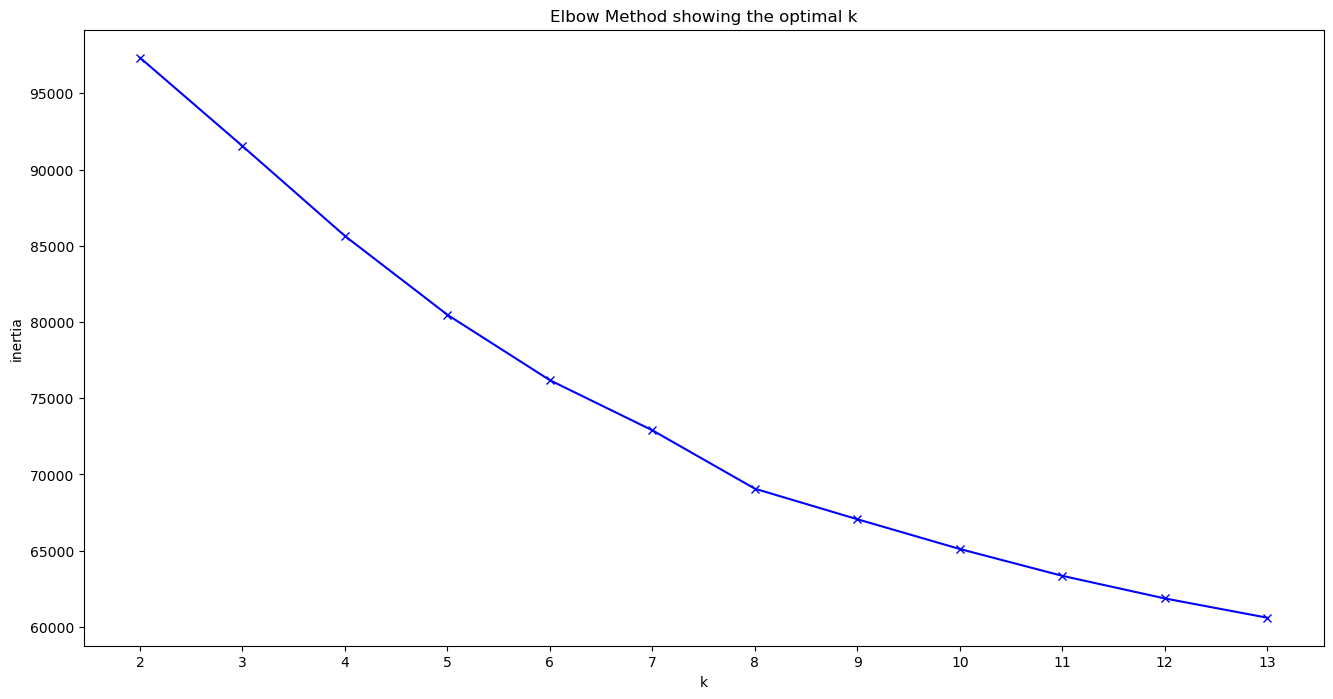

In [47]:
# As we have 13 features, set range (2-14)

K = range(2, 14)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep)
    inertia.append(kmeans.inertia_)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

- Difficult to assess the elbow point, but seems 8

###### Silhouette score

Text(0.5, 1.0, 'Slhouette score showing the optimal k')

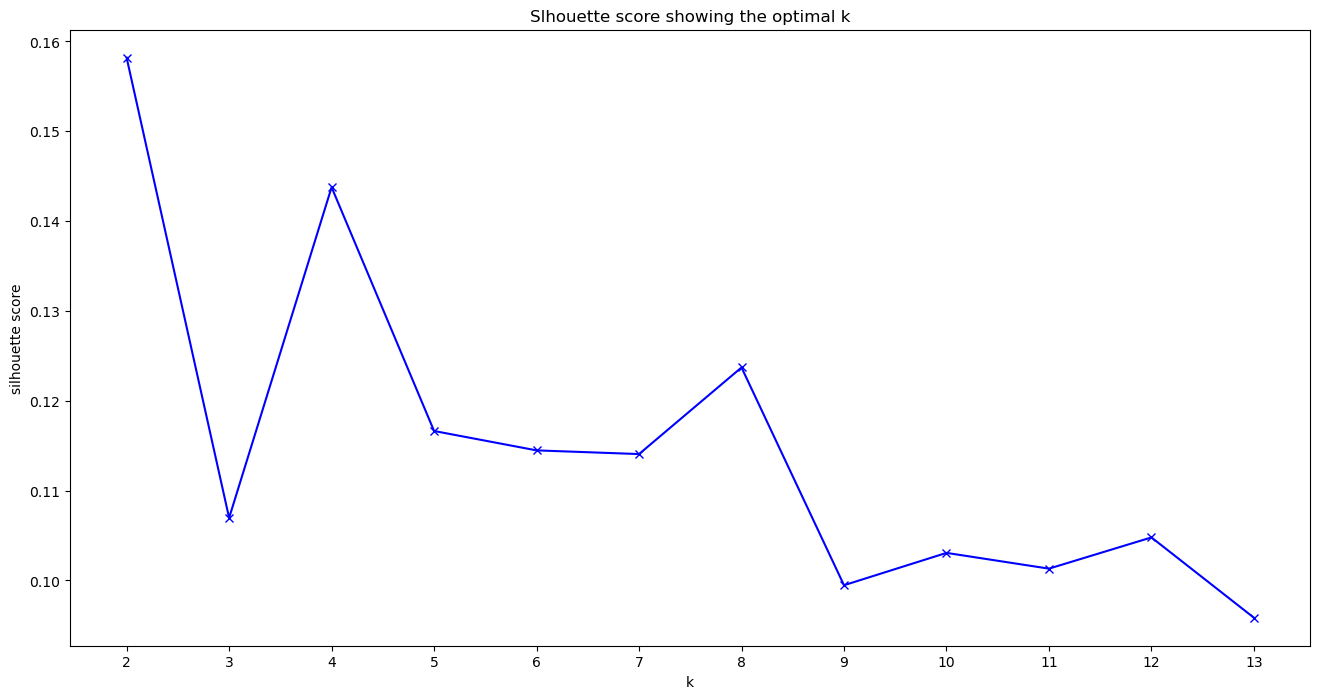

In [48]:
from sklearn.metrics import silhouette_score
K = range(2, 14)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=1234)
    kmeans.fit(X_prep)
    silhouette.append(silhouette_score(X_prep, kmeans.predict(X_prep)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Slhouette score showing the optimal k')

- Max value indicates 2 clusters would be optimal, second max value, 4 clusters and, third, 8 clusters just as elbow.

 - Before running it all again, max second value was 8, not 4.

#### Checking KMeans with 2 and 8 clusters

##### Number of clusters = 2

In [49]:
kmeans = KMeans(n_clusters=2, random_state=1234)
kmeans.fit(X_prep)

KMeans(n_clusters=2, random_state=1234)

In [50]:
# Predicting / assigning the clusters:
clusters = kmeans.predict(X_prep)

In [51]:
# Size of the clusters
pd.Series(clusters).value_counts().sort_index()

0    5291
1    2731
dtype: int64

In [52]:
clusters

array([1, 1, 0, ..., 0, 0, 0], dtype=int32)

In [53]:
#y.values
#pd.Series(y).value_counts().sort_index()

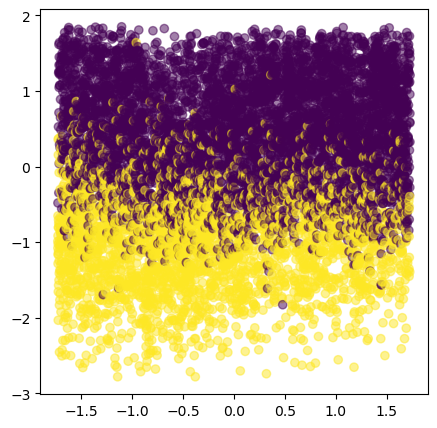

In [54]:
# Plotting (num clusters = 2)
plt.figure(figsize=(5, 5))
plt.scatter(X_prep[:, 0], X_prep[:, 2], c=clusters,alpha=0.5)

plt.show()

##### Number of clusters = 8

In [55]:
kmeans = KMeans(n_clusters=8, random_state=1234)
kmeans.fit(X_prep)

KMeans(random_state=1234)

In [56]:
# Predicting / assigning the clusters:
clusters = kmeans.predict(X_prep)

In [57]:
# Size of the clusters
pd.Series(clusters).value_counts().sort_index()

0    1194
1     502
2     512
3     181
4    1386
5    2376
6    1545
7     326
dtype: int64

In [58]:
clusters

array([0, 6, 0, ..., 5, 2, 4], dtype=int32)

In [59]:
#y.values
#pd.Series(y).value_counts().sort_index()

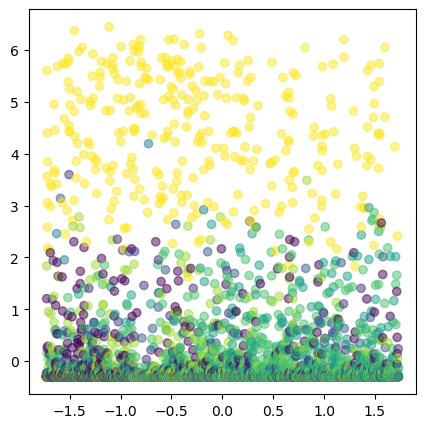

In [60]:
# Plotting (num clusters = 8)
plt.figure(figsize=(5, 5))
plt.scatter(X_prep[:, 0], X_prep[:, 8], c=clusters,alpha=0.5)

plt.show()

I'm keeping 8 clusters for my KMean model

In [61]:
# Number of songs in each cluster
pd.Series(clusters).value_counts().sort_index()

0    1194
1     502
2     512
3     181
4    1386
5    2376
6    1545
7     326
dtype: int64

Now I need to:

- Get the audio features from the input song
- Check against the clusters built by KMeans model
- Get the segment/cluster number

If song not in spotify_data, make a call to that particular song to recover its audio features data. (not done)

#### Function to identify the cluster of the target song and reccomend another one from that cluster

In [62]:
# The following function:

# First: 
## It takes numerical variables from spotify_data (corresponding to audio features)
## Select all X (no target yet)
## Scale values of X
## K-Means generate 8 clusters/segments (k=8 from elbow and 2nd max of silouhette)
## and fit the model with X scaled (X_prep)

# Second:
## If song_searched IN Spotify_data --> retrieve audio features for that song
## Scalate new audio features
## Check against the previous KMeans fitted model
## Obtain segment/cluster of searched song

# Third:
## Get all songs from searched song's cluster (kmeans.labels_)
## Looking for the most similar song in that cluster (cosine_similarity, np.argmax)
## Selecting also a random song from the same cluster


In [63]:
def get_song_cluster(song_searched, spotify_data):
    
    # All NUMERICAL columns AFTER 'uri' are the features to be taken
    features = spotify_data.select_dtypes(np.number)
    
    # Select X, but no target yet
    X = features

    # Scaling Data
    X_prep = StandardScaler().fit_transform(X)

    # Creating 8 clusters/segments (Kmeans)
    kmeans = KMeans(n_clusters=8, random_state=1234)
    kmeans.fit(X_prep)
    
    # Predicting / assigning the clusters:
    clusters = kmeans.predict(X_prep)
    
    # Converting both searched song and 'title' in spotify_data to lower case
    song_searched = song_searched.lower() 
    spotify_data['title'] = spotify_data['title'].str.lower()

    # Checking if the input song is in the Spotify data
    if song_searched in spotify_data['title'].values:
        
        # Extracting the features for the input song 
        # (filtering through boolean mask and selecting first row of filtered)
        song_features = features.loc[spotify_data['title']==song_searched].iloc[0]
    
    
        # Predicting/assigning a cluster for song_searched:
    
        # Solving dimensional issue and need for array:   
        # Convert target_song to a numpy array and reshape to be a 2-dimensional array with one row
        song_features_arr = np.array(song_features).reshape(1, -1)
    
        # Scaling target_song values using the same X_prep scaler used for X data
        song_features_prep = StandardScaler().fit(X_prep).transform(song_features_arr)
    
        # Predicting / assigning the cluster using the same Kmeans fitted before:
        song_cluster = kmeans.predict(song_features_prep)
    
        
        # Recommending the most similar song from that cluster:
        
        # Selecting all songs from the same cluster as song_searched (song_cluster)
        songs_in_cluster = spotify_data[kmeans.labels_ == song_cluster[0]]
        
                ## Note(I)
    
        # Comparing song_searched with songs in same cluster using cosine_similarity
        from sklearn.metrics.pairwise import cosine_similarity
        
                ## Note (II)
    
        # Calculating cosine similarity between searched song and songs in cluster
        similarities = cosine_similarity(song_features_prep, songs_in_cluster.select_dtypes(np.number))
    
        # Finding the most similar song in the cluster
        most_similar_song_idx = np.argmax(similarities)
        
                ## Note (III)
    
        # Retrieving the most similar song from the cluster
        most_similar_song = songs_in_cluster.iloc[most_similar_song_idx]['title']
    
    
        # Recommending another random song from that cluster:
        
        # Selecting a random song from that cluster
        random_song_idx = np.random.choice(np.where(kmeans.labels_ == song_cluster)[0])

        # Check random_song and most_similar_sonog are not the same. If so, repeat random choice.
        while spotify_data.iloc[random_song_idx]['title'] == most_similar_song:
            random_song_idx = np.random.choice(np.where(kmeans.labels_ == song_cluster)[0])

        # Getting title of random song
        random_song = spotify_data.iloc[random_song_idx]['title']

    
    
        display(Markdown(f"The song '**{song_searched.capitalize()}**' belongs to cluster '**{song_cluster[0]}**'.\n\n"
                  f"The most similar song in the cluster is '**{most_similar_song.capitalize()}**'.\n\n"
                  f"Here's a random song from the same cluster: '**{random_song.capitalize()}**'."))

 
    
    else:
    
        return f"The song '**{song_searched}**' is not in the Spotify data."


###### Note (I): .labels_

".labels_" is an attribute of the KMeans object in scikit-learn that stores the cluster labels assigned to each sample in the input data. After fitting the KMeans object to the data using the fit() method, you can access the cluster labels for each sample by calling the labels_ attribute.

###### Note (II): Cosine Similarity

'cosine_similarity' is a function from the scikit-learn library that calculates the cosine similarity between two arrays. The cosine similarity is a measure of the similarity between two non-zero vectors in an n-dimensional space. It is defined as the cosine of the angle between the two vectors, and its value ranges from -1 to 1. A cosine similarity of 1 means that the vectors are identical, while a cosine similarity of -1 means that the vectors are completely dissimilar.

This function takes two arrays as input and returns a matrix of pairwise cosine similarities between the rows of the input arrays.

###### Note (III): np.argmax

"np.argmax" is a function from the numpy library that returns the index of the maximum value in an array along a specified axis. The function takes an array as input and returns the index of the maximum value in the array. If the input array has more than one dimension, you can specify the axis along which to find the maximum value.

In [64]:
spotify_data['title'][34:40]

34          Sweet Child O' Mine
35     A Forest - 2006 Remaster
36         The Sound of Silence
37                 Door De Wind
38                     Innuendo
39    The Chain - 2004 Remaster
Name: title, dtype: object

In [65]:
# Input
song_searched = input("Introduce the name of a song: ")
# Applying function
get_song_cluster(song_searched, spotify_data)

Introduce the name of a song: the sound of silence


The song '**The sound of silence**' belongs to cluster '**7**'.

The most similar song in the cluster is '**Heroes - 2017 remaster**'.

Here's a random song from the same cluster: '**Get ready**'.